# MATH2319 Machine learing course project 

## Predicting diabetic outcome in pima indians

# Table of contents

### 1. Overview
### 2. Objective
### 3. Data preprocessing
### 4. Data visualisation
#####   4.1 One variable visualisation
#####   4.2 Two variable Visualisation
#####   4.3 Three plot visualisations
### 5. Data modelling
#####   5.1 Methodology overview
#####   5.2 KNN-nearest neighbor model
#####   5.3 Decision Tree
#####   5.4 Support Vector Machine
#####   5.5 Random Forest
#####   5.6 Logistic Regression
### 6. Performance comparison (T-test analysis)
### 7. Checking the ROC Curves and the AUC Scores for all the graphs
### 8. Model analysis
### 9. Summary
### 10. References   

## 1.Overview

##### The following report analyses a dataset retrieved from Kaggle which was originally sourced from the National Institute of Diabetes and Digestive and Kidney diseases within the USA. The dataset contains 768 observations coming from Pima Indians of which all had been tested as either positive or negative for diabetes. These predictions were based on the diagnostic measurements which define the feature variables used for this supervised machine learning task. A link to this dataset will be included in the references section of this report.

##### The features used as predictors in this task include the number of pregnancies a patient has had, their BMI, glucose  and insulin levels as well as their age, skin thickness and diabetes pedigree function score. All the participants in this dataset are women and as such allow the use of a pregnancy variable to be a key predictor of them being a diabetic or not.

##### BMI refers to the body mass Index of an individual and is a measure of a person’s weight (kilograms) divided by their height (meters). The BMI score is generally used to classify people into weight categories including being underweight, healthy wight, overweight or obese. This measurement can provide considerable insight as to how an individual may metabolize sugars (which is heavily related to a person being classified as a diabetic). The skin thickness variable also provides similar information by measuring the thickness of a skin fold at the individual’s triceps thus revealing information about the participants body composition. Furthermore, the participants  blood pressure and ages were also recorded as they too can provide useful information about an individual’s wholistic health

##### The glucose feature in the dataset refers to the participants plasma glucose concentration at 2 hours after being administered an oral glucose tolerance test. Similarly, the individual’s insulin levels are also measured at this time point. In a healthy individual, upon consumption of sugars (glucose in this case), insulin is released from specialized cells to reduce sugar levels. However, the insulin response of a diabetic individual is usually impaired or not present at all. 

##### Lastly, The diabetes pedigree function score is a numerical measure for each observation which is based on the individuals genetic predisposition to having diabetes. 

##### Essentially, each observation was tested for all the above-mentioned feature variables and based on that, a person who tested positive for diabetes would be receive a 1 in the “Outcome” target feature. A participant that receives a negative test result is demarcated by a 0.


##### Data reference URL: https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

## 2.Objective

## 3. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
total=diabetes.isnull().sum()
percent=(((diabetes.isnull().sum()/diabetes.isnull().count()))*100)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [6]:
diabetes['Diabetes']=np.where(diabetes.Outcome==0,'Negative','Positive')

#### After completing both checks, it was confirmed that the original dataset was in fact clean to start with. Furthermore, the original dataset did not contain any ID- like columns that needed to be dropped. Lastly, For the purposes of creating visualisations that are easy to comprehend, a new column was added which simply depicted observations that were diabetic as “Positive” and non-diabetics as “Negative”.

## 4.Data visualisation

### 4.1 One variable visualisation

Text(0.5, 1.0, 'Frequency distribution of Pregnancy groups')

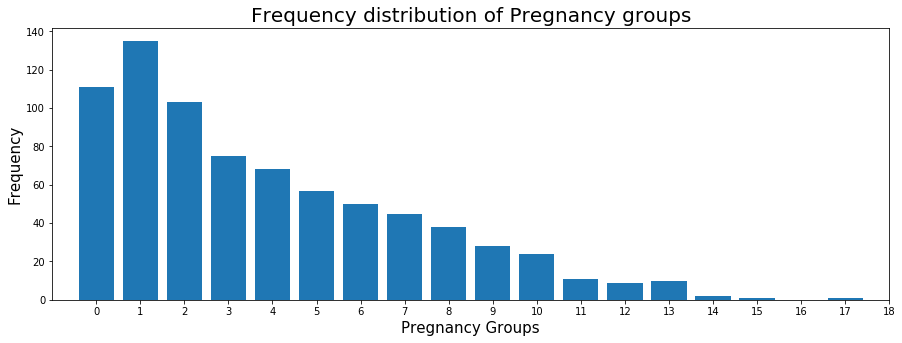

In [7]:
plt.figure(figsize=(15,5))
preg=diabetes['Pregnancies'].value_counts()
plt.bar(preg.index,preg.values)
plt.xlim([-1,18])
plt.xticks(np.arange(19))
plt.xlabel("Pregnancy Groups",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency distribution of Pregnancy groups",size=20)


Text(0.5, 1.0, 'Frequency distribution of BMI')

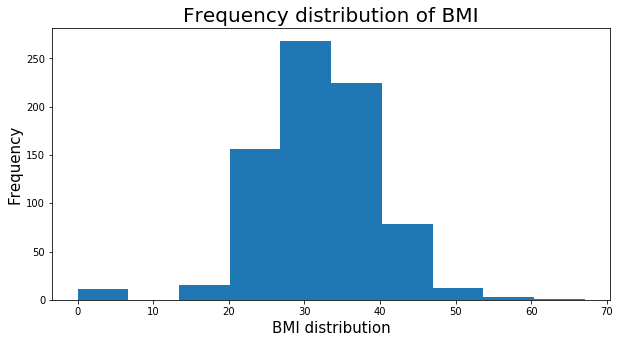

In [8]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['BMI'])
plt.xlabel("BMI distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency distribution of BMI",size=20)

Text(0.5, 1.0, 'Frequency distribution of Age groups')

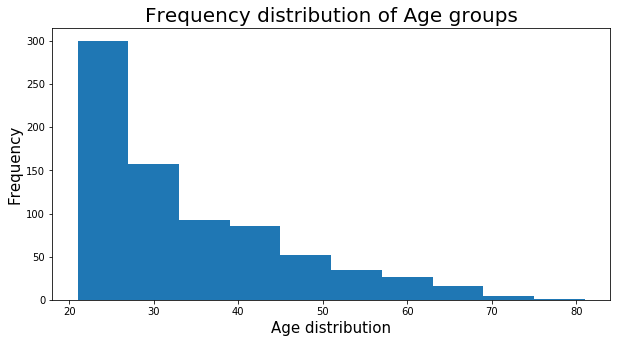

In [9]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['Age'])
plt.xlabel("Age distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency distribution of Age groups",size=20)
#plt.xlim([10,80])

Text(0.5, 1.0, 'Diabetes Pedigree Score Frequency distribution')

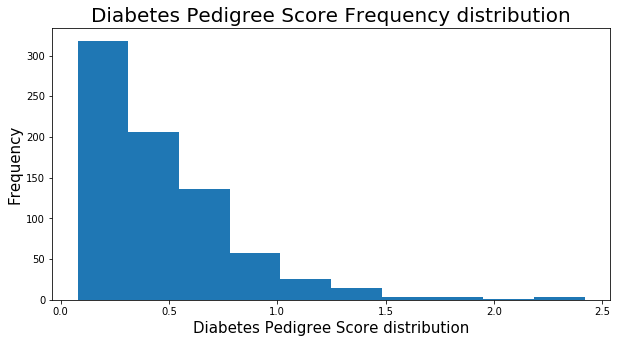

In [10]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['DiabetesPedigreeFunction'])
plt.xlabel("Diabetes Pedigree Score distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Diabetes Pedigree Score Frequency distribution",size=20)

Text(0.5, 1.0, 'Glucose Frequency distribution')

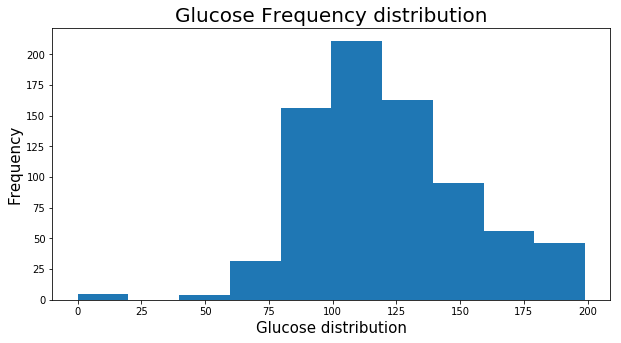

In [11]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['Glucose'])
plt.xlabel("Glucose distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Glucose Frequency distribution",size=20)

Text(0.5, 1.0, 'Blood Pressure Frequency distribution')

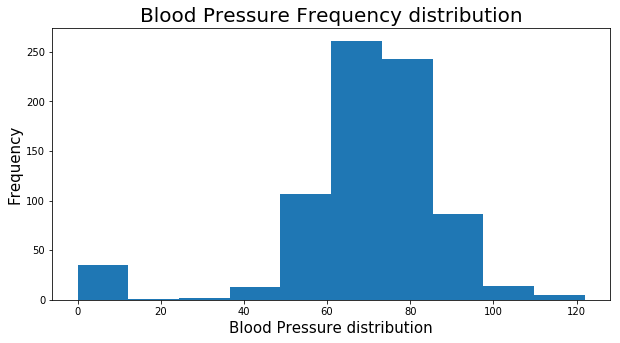

In [12]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['BloodPressure'])
plt.xlabel("Blood Pressure distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Blood Pressure Frequency distribution",size=20)

([<matplotlib.axis.XTick at 0x24435bdfb38>,
 <a list of 13 Text xticklabel objects>)

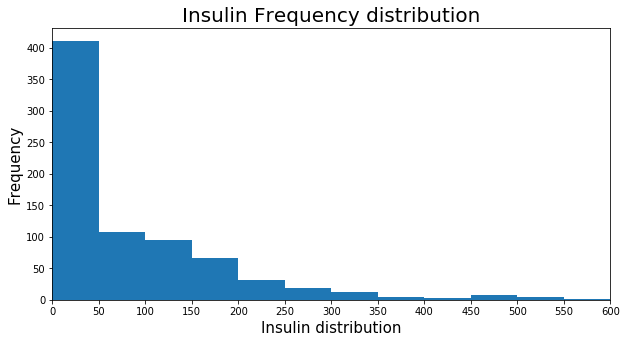

In [13]:
plt.figure(figsize=(10,5))
plt.hist(diabetes['Insulin'],bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700])
plt.xlabel("Insulin distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Insulin Frequency distribution",size=20)
plt.xlim(0,600)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550,600])

Text(0.5, 1.0, 'Diabetic Outcome frequency distribution')

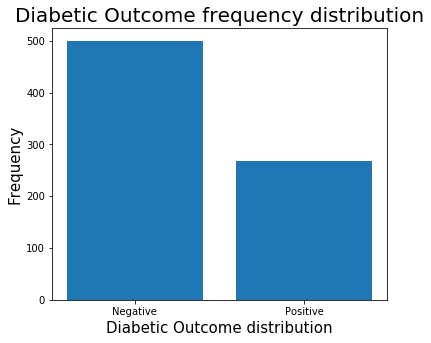

In [14]:
plt.figure(figsize=(6,5))
outcome=diabetes['Diabetes'].value_counts()
plt.bar(outcome.index,outcome.values)
plt.xlabel("Diabetic Outcome distribution",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Diabetic Outcome frequency distribution",size=20)

### 4.2 Two variable Visualisation

Text(0.5, 1.0, 'BMI with respect to diabetes outcome')

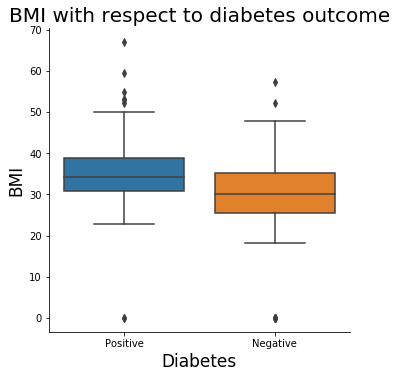

In [15]:
# BMI and Outcome
sns.catplot(x="Diabetes",y="BMI",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("BMI",size=17)
plt.title("BMI with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Glucose concentration with respect to diabetes outcome')

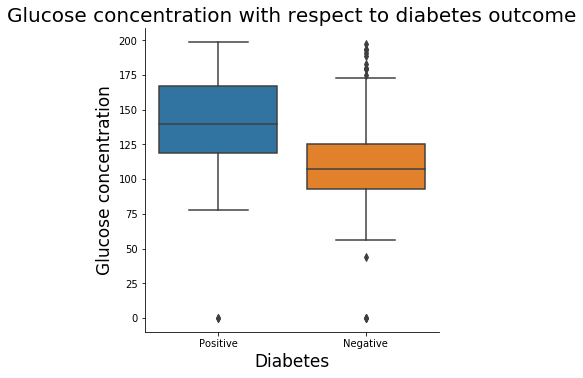

In [16]:
#Glucose and Outcome
sns.catplot(x="Diabetes",y="Glucose",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Glucose concentration",size=17)
plt.title("Glucose concentration with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Diastolic Blood Pressure with respect to diabetes outcome')

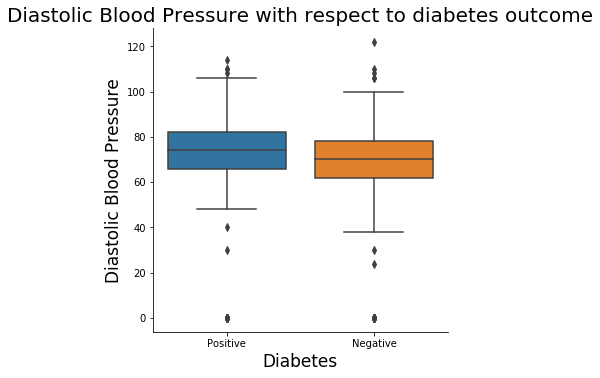

In [17]:
#BloodPressure and Outcome
sns.catplot(x="Diabetes",y="BloodPressure",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Diastolic Blood Pressure",size=17)
plt.title("Diastolic Blood Pressure with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Skin Thickness with respect to diabetes outcome')

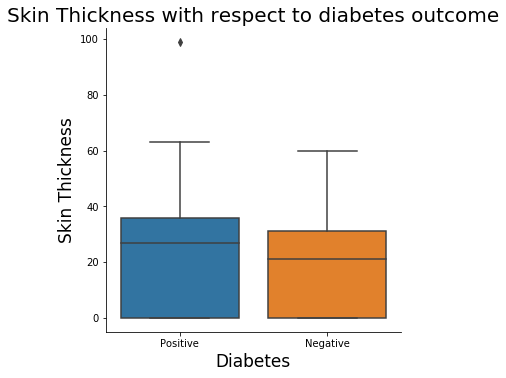

In [18]:
#SkinThickness and Outcome
sns.catplot(x="Diabetes",y="SkinThickness",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Skin Thickness",size=17)
plt.title("Skin Thickness with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Insulin concentration with respect to diabetes outcome')

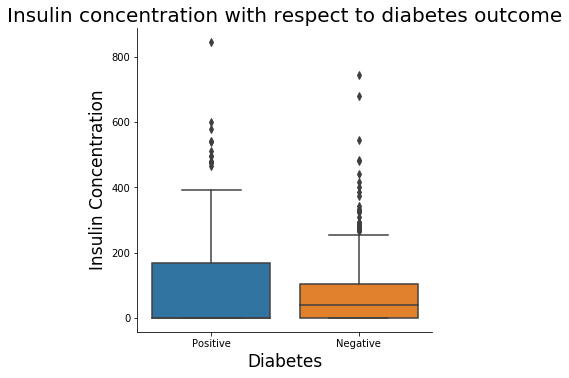

In [19]:
#Outcome and Insulin
sns.catplot(x="Diabetes",y="Insulin",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Insulin Concentration",size=17)
plt.title("Insulin concentration with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Pedigree Score with respect to diabetes outcome')

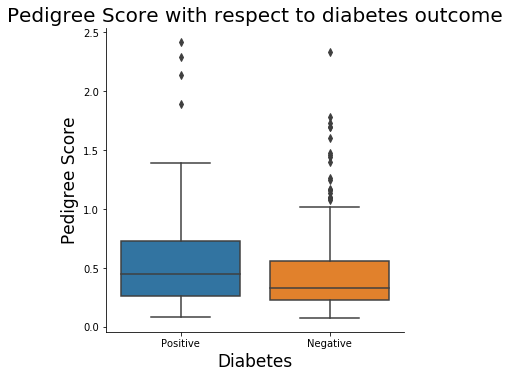

In [20]:
#Diabetes Pedigree Score and Outcome

sns.catplot(x="Diabetes",y="DiabetesPedigreeFunction",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Pedigree Score",size=17)
plt.title("Pedigree Score with respect to diabetes outcome",size=20)

Text(0.5, 1.0, 'Age with respect to diabetes outcome')

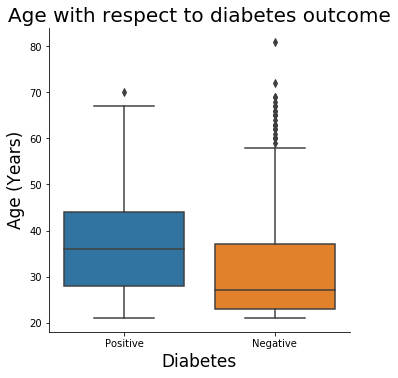

In [21]:
#Age and Diabetes Outcome

sns.catplot(x="Diabetes",y="Age",data=diabetes,kind="box")
plt.xlabel("Diabetes",size=17)
plt.ylabel("Age (Years)",size=17)
plt.title("Age with respect to diabetes outcome",size=20)

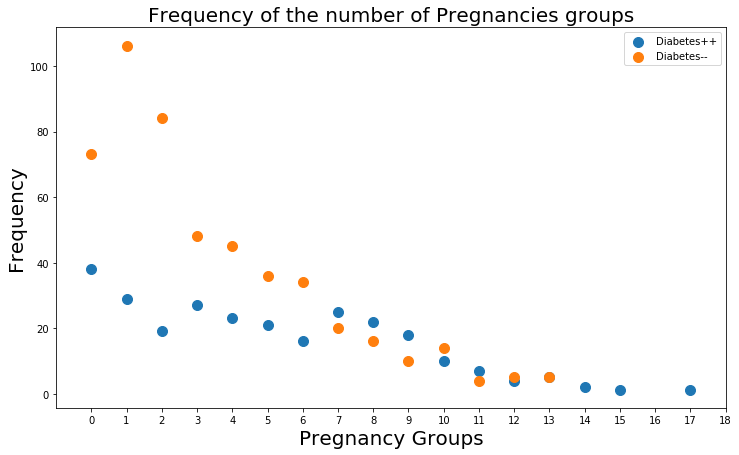

In [22]:
#Pregnancy and diabetes Outcome

plt.figure(figsize=(12,7))
Outcome_1=diabetes[diabetes.Outcome== 1]
Outcome_0=diabetes[diabetes.Outcome== 0]
counts1=Outcome_1['Pregnancies'].value_counts()
counts0=Outcome_0['Pregnancies'].value_counts()
plt.scatter(counts1.index,counts1.values,label="Diabetes++",s=100)
plt.scatter(counts0.index,counts0.values,label="Diabetes--",s=100)
plt.xlim([-1,18])
plt.xticks(np.arange(19))
plt.title("Frequency of the number of Pregnancies groups",size=20)
plt.xlabel("Pregnancy Groups",size=20)
plt.ylabel("Frequency",size=20)
plt.legend()
plt.show()

###  4.3 Three plot visualisations

In [23]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,0,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


Text(0.5, 1.0, 'Pregnancy groups with regards to age and diabetic outcome')

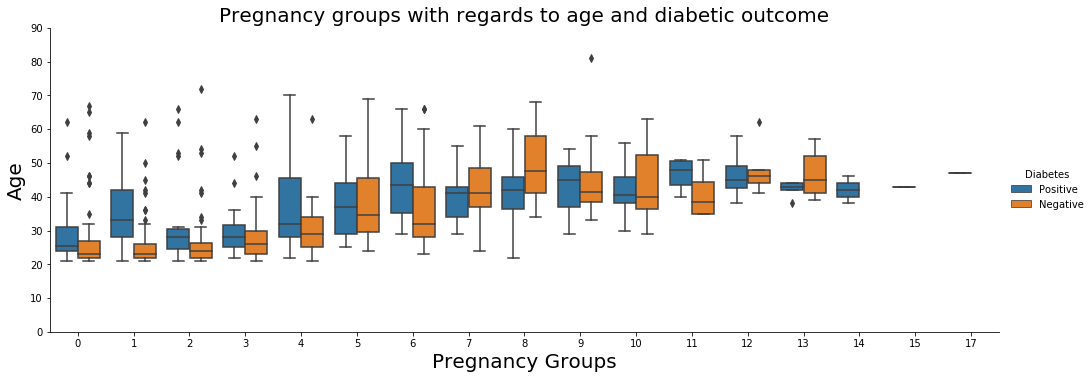

In [24]:
sns.catplot(x="Pregnancies",y="Age",kind="box",data=diabetes,hue="Diabetes",aspect=14/5)
plt.ylim(0,90)
plt.xlabel("Pregnancy Groups",size=20)
plt.ylabel("Age",size=20)
plt.title("Pregnancy groups with regards to age and diabetic outcome",size=20)

Text(0.5, 1.0, 'Glucose-Insulin concentration comparison with respect to diabetic outcome')

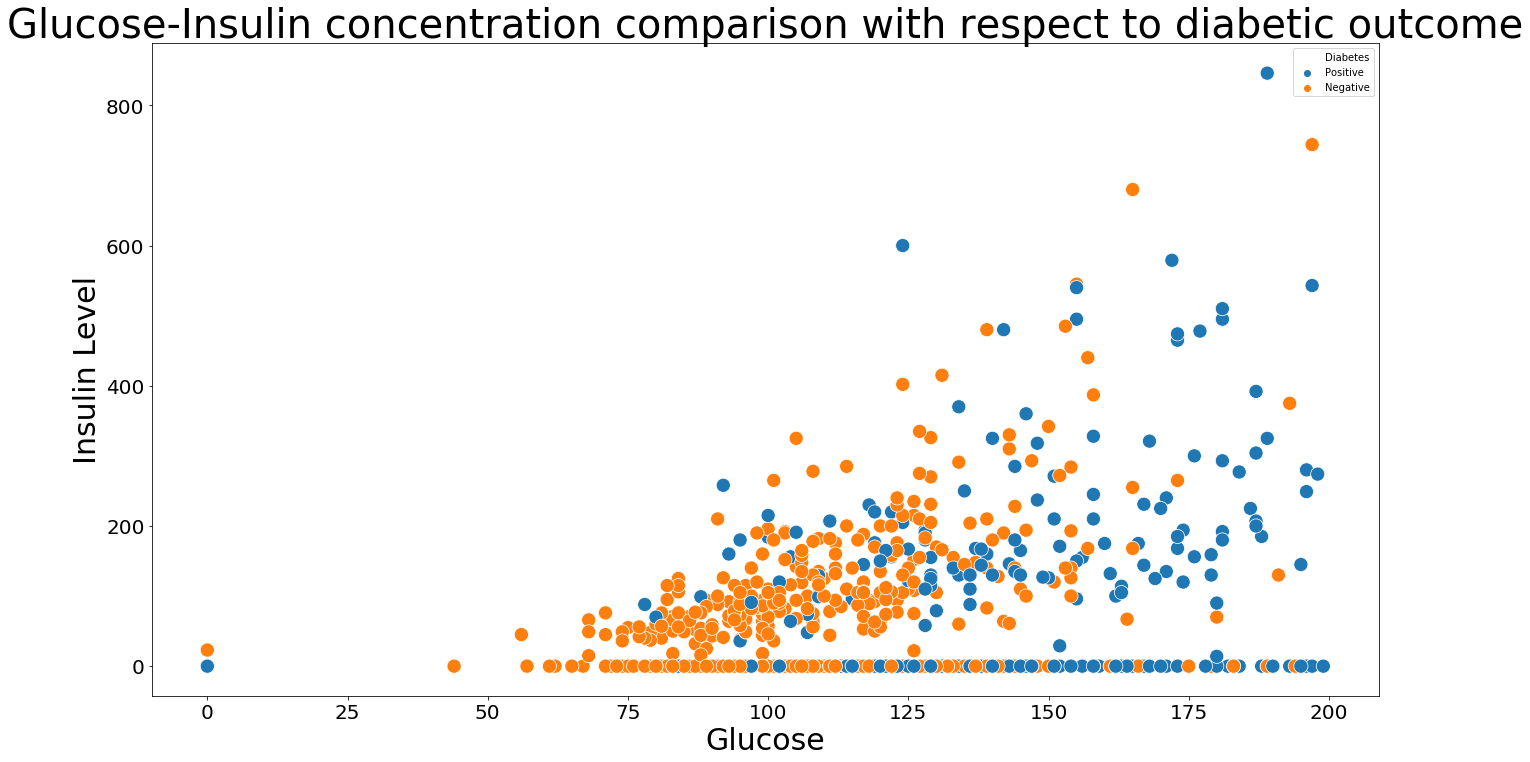

In [25]:
plt.figure(figsize=(22,12))
sns.scatterplot(x='Glucose',y='Insulin',data=diabetes,hue='Diabetes',s=200,legend="full")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("Glucose",size=30)
plt.ylabel("Insulin Level",size=30)
plt.title("Glucose-Insulin concentration comparison with respect to diabetic outcome",size=40)

Text(0.5, 1.0, 'Exploring Skin Thickness versus BMI with respect to diabetic outcome')

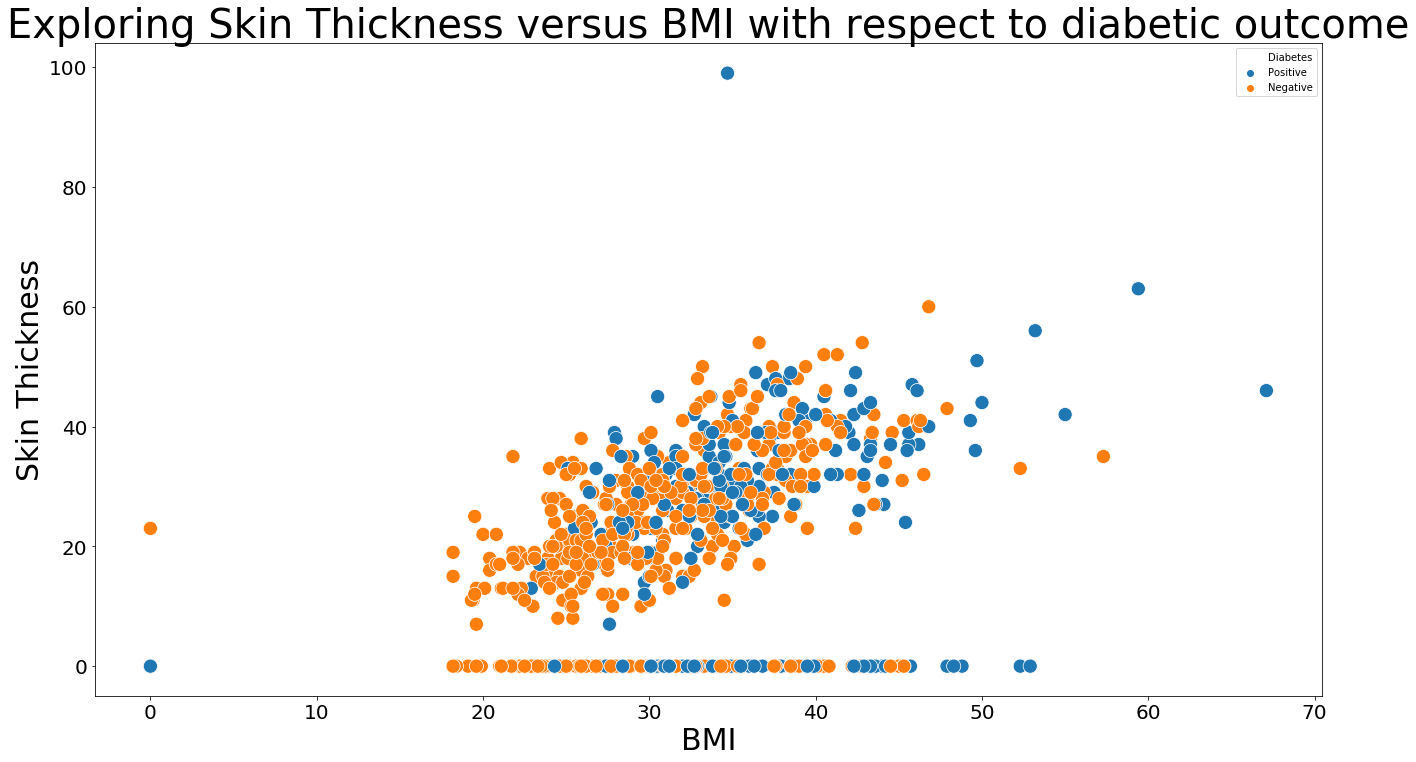

In [26]:
plt.figure(figsize=(22,12))
sns.scatterplot(x='BMI',y='SkinThickness',data=diabetes,hue='Diabetes',s=200,legend="full")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("BMI",size=30)
plt.ylabel("Skin Thickness",size=30)
plt.title("Exploring Skin Thickness versus BMI with respect to diabetic outcome",size=40)

Text(0.5, 1.0, 'Exploring Relationship BMI and Blood Pressure with respect to diabetic outcome')

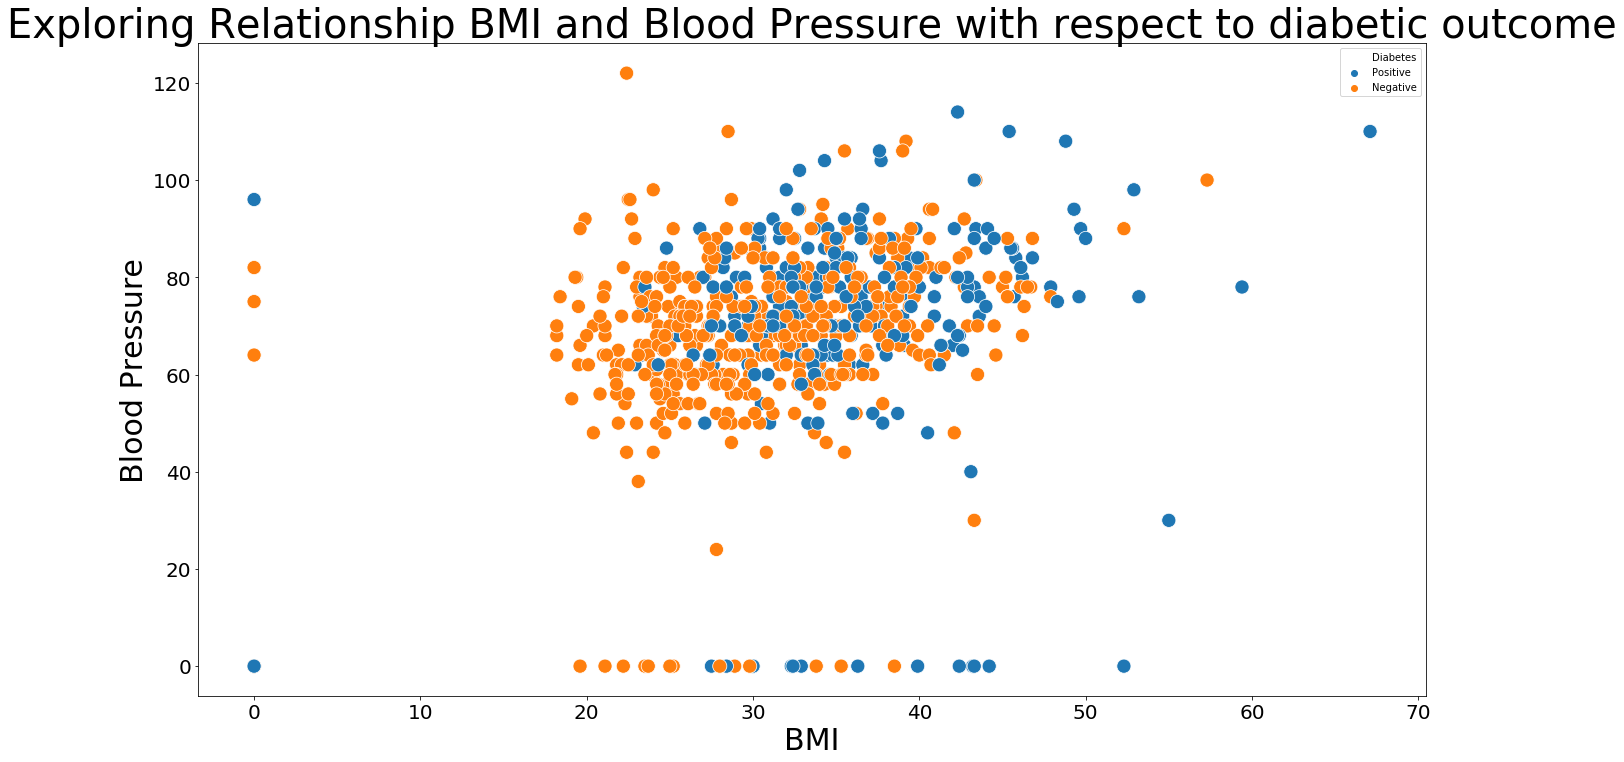

In [27]:
plt.figure(figsize=(22,12))
sns.scatterplot(x='BMI',y='BloodPressure',data=diabetes,hue='Diabetes',s=200,legend="full")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("BMI",size=30)
plt.ylabel("Blood Pressure",size=30)
plt.title("Exploring Relationship BMI and Blood Pressure with respect to diabetic outcome",size=40)

##  5. Data Modelling

###  5.1 Methodology overview

In [28]:
# We are going to divide our data here with X and y as the assigning values

y=diabetes['Outcome']
X=diabetes.drop('Outcome',axis=1)
X=X.drop('Diabetes',axis=1)# dropping unnecessary column

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
ml_data=scaler.fit_transform(X)
X_scaled=pd.DataFrame(ml_data,columns=X.columns)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=999,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


### 5.2 KNN-nearest neighbor model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#We shall do KNN Algorithm using GridSearchCV

In [33]:
scoring_metric='roc_auc'

In [34]:
#We shall define a Cross Validation Method
cv_method_train = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [35]:
#We shall define different parameters of KNN into this Params_knn column
params_knn={'n_neighbors':np.arange(1,40,1),'p':[1,2]}

In [36]:
# We are going to assign the enitre GridSearchCV method to a variable
knn=GridSearchCV(estimator=KNeighborsClassifier(),
                param_grid=params_knn,
                cv=cv_method_train,
                verbose=1,
                scoring=scoring_metric)

In [37]:
#Fitting the above assigned variable to X_train and Y_train

knn.fit(X_train,y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    3.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [38]:
#Checking the best parameters
knn.best_params_

{'n_neighbors': 35, 'p': 1}

In [39]:
#Cheking the best score
knn.best_score_

0.8101084716576332

### Making ROC Curve for the KNN ALgorithm

In [40]:
knn_best_probs=KNeighborsClassifier(n_neighbors=35,p=1)
knn_best_probs.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=1,
           weights='uniform')

Text(0.5, 1.0, 'ROC Plot')

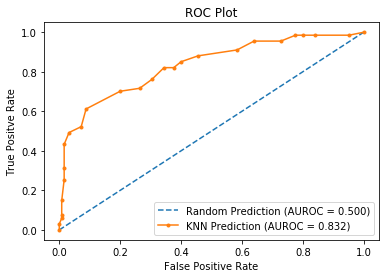

In [41]:
r_probs = [0 for _ in range(len(y_test))]
knn_probs = knn_best_probs.predict_proba(X_test)

knn_probs = knn_probs[:, 1]

r_auc=roc_auc_score(y_test,r_probs)
knn_auc=roc_auc_score(y_test,knn_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.',label="KNN Prediction (AUROC = %0.3f)" %knn_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.legend()
plt.title("ROC Plot")

###  5.3 Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
#We shall define a Cross Validation Method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [44]:
#We shall define different parameters of Decision Tree into this Params_dt column
params_DecisionTree={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,12,1),
                    'max_features':['auto','sqrt','log2']}

In [45]:
# We are going to assign the enitre GridSearchCV method to a variable

dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                param_grid=params_DecisionTree,
                cv=cv_method_train,
                verbose=1,
                scoring=scoring_metric)

In [46]:
#Fitting the above assigned variable to X_train and Y_train

dt.fit(X_train,y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:    2.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [47]:
#Checking the best parameters
dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [48]:
#Checking the best score
dt.best_score_

0.7510153074186992

### Making ROC Curve for the Decision Tree classifier

In [49]:
dt_best_probs=DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features='sqrt',splitter='best')
dt_best_probs.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0.5, 1.0, 'ROC Plot')

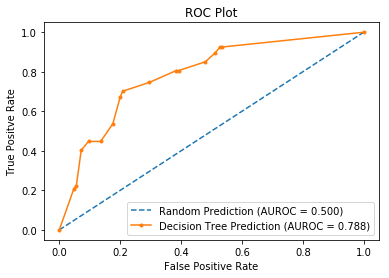

In [50]:
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_best_probs.predict_proba(X_test)

dt_probs = dt_probs[:, 1]

r_auc=roc_auc_score(y_test,r_probs)
dt_auc=roc_auc_score(y_test,dt_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.',label="Decision Tree Prediction (AUROC = %0.3f)" %dt_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.legend()
plt.title("ROC Plot")

###  5.4 Support Vector Machine

In [51]:
from sklearn.svm import SVC

In [52]:
#We shall define different parameters of Decision Tree into this Params_svc column

params_svc={'kernel':['linear', 'poly','rbf','sigmoid'],'C':[1,2,3],'gamma':['scale','auto'],'probability':[True,False]}

In [53]:
# We are going to assign the enitre GridSearchCV method to a variable

svc=GridSearchCV(estimator=SVC(),
                param_grid=params_svc,
                cv=cv_method_train,
                verbose=1,
                scoring=scoring_metric)

In [54]:
#Fitting the above assigned variable to X_train and Y_train

svc.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 2, 3], 'gamma': ['scale', 'auto'], 'probability': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [55]:
#Checking the best parameters
svc.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [56]:
#Checking the best score
svc.best_score_

0.8207764509936766

### Making ROC Curve for Support Vector Machine

In [57]:
svm_best_probs=SVC(C=1,gamma='scale',kernel='rbf',probability=True)
svm_best_probs.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 1.0, 'ROC Plot')

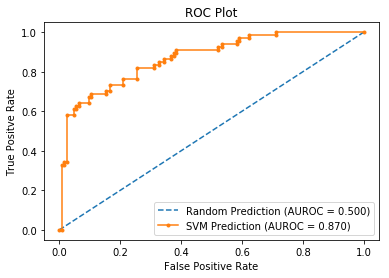

In [58]:
r_probs = [0 for _ in range(len(y_test))]
svm_probs = svm_best_probs.predict_proba(X_test)

svm_probs = svm_probs[:, 1]

r_auc=roc_auc_score(y_test,r_probs)
svm_auc=roc_auc_score(y_test,svm_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(svm_fpr, svm_tpr, marker='.',label="SVM Prediction (AUROC = %0.3f)" %svm_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.legend()
plt.title("ROC Plot")

### 5.5 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
#We shall define different parameters of Decision Tree into this Params_RF column

params_RF={'max_features':['auto','sqrt','log2'],'n_estimators':np.arange(400,2000,400),
           'max_depth':[10,20,30]}

In [61]:
# We are going to assign the enitre GridSearchCV method to a variable

rf=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=params_RF,
                cv=cv_method_train,
                verbose=1,
                scoring=scoring_metric)

In [62]:
#Fitting the above assigned variable to X_train and Y_train

rf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': array([ 400,  800, 1200, 1600]), 'max_depth': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [63]:
#Checking the best parameters
rf.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}

In [64]:
#Checking the best score
rf.best_score_

0.8293044969512194

### ROC Curve for Random Forest Classifier

In [65]:
rf_best_probs=RandomForestClassifier(max_depth=10,max_features='log2',n_estimators=800)
rf_best_probs.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 1.0, 'ROC Plot')

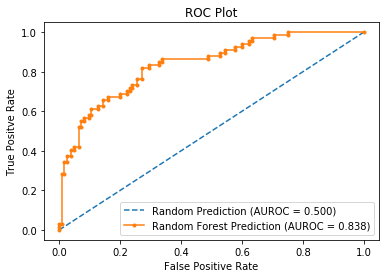

In [66]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_best_probs.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

r_auc=roc_auc_score(y_test,r_probs)
rf_auc=roc_auc_score(y_test,rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.',label="Random Forest Prediction (AUROC = %0.3f)" %rf_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.legend()
plt.title("ROC Plot")

### 5.6 Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
## Doing Logistic Regression using GridsearchCV method

In [69]:
#We shall define different parameters of Decision Tree into this Params_logreg column

params_logreg={'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'multi_class':['auto','ovr'],'C':[1,2]}

In [70]:
# We are going to assign the enitre GridSearchCV method to a variable

logreg=GridSearchCV(estimator=LogisticRegression(),
                param_grid=params_logreg,
                cv=cv_method_train,
                verbose=1,
                scoring=scoring_metric)

In [71]:
#Fitting the above assigned variable to X_train and Y_train

logreg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'multi_class': ['auto', 'ovr'], 'C': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [72]:
#Checking the best parameters
logreg.best_params_

{'C': 2, 'multi_class': 'auto', 'solver': 'lbfgs'}

In [73]:
#Checking the best score
logreg.best_score_

0.815397470641373

### Making ROC Curve for Logistic Regression

In [74]:
logreg_best_probs=LogisticRegression(C=2,multi_class='auto',solver='lbfgs')
logreg_best_probs.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Text(0.5, 1.0, 'ROC Plot')

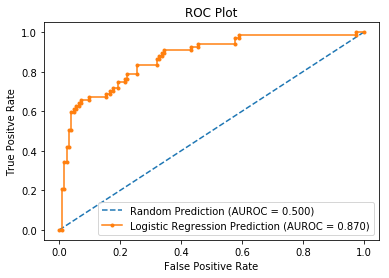

In [75]:
r_probs = [0 for _ in range(len(y_test))]
logreg_probs = logreg_best_probs.predict_proba(X_test)

logreg_probs = logreg_probs[:, 1]

r_auc=roc_auc_score(y_test,r_probs)
logreg_auc=roc_auc_score(y_test,logreg_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.',label="Logistic Regression Prediction (AUROC = %0.3f)" %logreg_auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.legend()
plt.title("ROC Plot")

### 6. Performance comparison (T-test analysis)

####  K-foldcross-validation paired t-tests

In [76]:
# We are going to convert our X and y Dataframes to arrays 
y_cv=y.to_numpy()
X_scaled_cv=X_scaled.to_numpy()

#### Between KNN and Decision Tree

In [77]:
from mlxtend.evaluate import paired_ttest_kfold_cv

In [78]:
k1=KNeighborsClassifier(n_neighbors=35, p=1)
dt=DecisionTreeClassifier(criterion='entropy', max_depth= 6,max_features= 'log2',splitter= 'best')
t, p = paired_ttest_kfold_cv(estimator1=k1,
                              estimator2=dt,
                              X=X_scaled_cv, y=y_cv,
                              random_seed=1)


print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.664
p value: 0.523


#### Between SVM and Random Forest

In [79]:
svm_classifier = SVC(C= 1,gamma='scale',kernel= 'rbf')
rf=RandomForestClassifier(max_depth=30,max_features='sqrt',n_estimators=400)
t, p = paired_ttest_kfold_cv(estimator1=svm_classifier,
                              estimator2=rf,
                              X=X_scaled_cv, y=y_cv,
                              random_seed=1)


print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 1.113
p value: 0.294


#### Between Logistic Regression and KNN

In [80]:
logreg= LogisticRegression(C=2,multi_class='auto',solver='lbfgs')
k1=KNeighborsClassifier(n_neighbors=35, p=1)
t, p = paired_ttest_kfold_cv(estimator1=logreg,
                              estimator2=k1,
                              X=X_scaled_cv, y=y_cv,
                              random_seed=1)


print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 1.767
p value: 0.111


#### Between Decision Tree and SVM

In [81]:
svm_classifier =  SVC(C= 1,gamma='scale',kernel= 'rbf')
dt=DecisionTreeClassifier(criterion='entropy', max_depth= 5,max_features= 'log2',splitter= 'best')
t, p = paired_ttest_kfold_cv(estimator1=svm_classifier,
                              estimator2=dt,
                              X=X_scaled_cv, y=y_cv,
                              random_seed=1)


print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 4.780
p value: 0.001


#### Between Random Forest and Logistic Regression

In [82]:
rf=RandomForestClassifier(max_depth=30,max_features='sqrt',n_estimators=400)
logreg= LogisticRegression(C=2,multi_class='auto',solver='lbfgs')
t, p = paired_ttest_kfold_cv(estimator1=rf,
                              estimator2=logreg,
                              X=X_scaled_cv, y=y_cv,
                              random_seed=1)


print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.119
p value: 0.908


### 7. Checking the ROC Curves and the AUC Scores for all the graphs

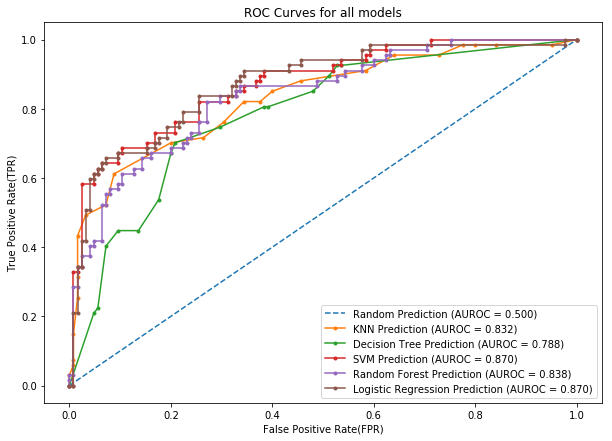

In [83]:
plt.figure(figsize=(10,7))
plt.plot(r_fpr, r_tpr, linestyle='--',label="Random Prediction (AUROC = %0.3f)" %r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.',label="KNN Prediction (AUROC = %0.3f)" %knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.',label="Decision Tree Prediction (AUROC = %0.3f)" %dt_auc)
plt.plot(svm_fpr, svm_tpr, marker='.',label="SVM Prediction (AUROC = %0.3f)" %svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.',label="Random Forest Prediction (AUROC = %0.3f)" %rf_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.',label="Logistic Regression Prediction (AUROC = %0.3f)" %logreg_auc)
plt.title("ROC Curves for all models")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.legend()

### 8. Model analysis

##### The logistic regression model is a commonly used algorithm used for classification. It essentially is a more generalized form of the linear regression model. The Key advantages of this model is its simplicity in implementing and understanding and that it can perform extremely well if there is a linear association between the independent and dependent variables being explored. Furthermore, this model provides information on a how good a predictor is and tells you whether it has a positive or negative association. Despite these benefits however, the model’s primary drawback is that it makes the assumption of linearity between the independent and dependent variables (which is often not quite the case in the real world). In the context of this study, not all variables depict a linear association, as a result, it may lead to less accurate predictions in detecting diabetes.

##### Another commonly used machine learning algorithm is the KNN method. It is a simple yet effective algorithm which classifies new data points according to their K-nearest neighbors. The advantages of using such an algorithm is that it is very easy to use and fine tune as only the value of K and the distance measured need to be altered. Furthermore, there is no explicit training period for this algorithm thus adding to its simplicity. Furthermore, it is also possible to add new training data without compromising the accuracy of the algorithm. However, the main disadvantages of this algorithm are that it does not deal well with large datasets. Larger datasets will have bigger distances and hence will affect the performance of the algorithm. Furthermore, datasets with high dimensionality make it make it harder for the algorithm to calculate minskowski distances for each dimension. Lastly KNN can not be performed on raw datasets as the data needs to be scaled and performance is hindered greatly by noisy data. With the diabetes dataset, exploring the association of 7 feature variables maybe a bit much as calculating the minskowski distances becomes harder as it needs it needs to done for each dimension. As this dataset is a relatively small one, this can be a good candidate. However this model is a lazy learner and thus needs to be continuosly updated to make accurate diabetes predictions.

##### The decision tree model is probably one of the easiest models to construct as each node can represent a potentional condition represented in the human body. Furthermore, it has the benefits of not needing to scale the data and is not affected by missing/irrational values. In the case of this study, the decision tree could be a good model for this data as they work well on classification cases. However, it is important to note that innaccuracies in measurments (or even diagnostic equipment) can introduce changes into the structure hence causing instability in the tree. If the study were to introduce even more more variables, than the decision tree depth and complexity will increase in addition to its increased need of computtional resources. 

##### One of the most robust machine learning algorithms today is the random forest model. It implements bagging and ensemble learning to develop many decision trees and combines all of them together. The benefit of this is that it reduces any potential overfitting and reduces variance. Furthermore, as this algorithms develops many different decision trees, its results are very stable and less affected by noise. It is also capable of handling both categorical and continuous variables. There are not many downsides to using this algorithm as it is very consistent in its findings. However this robustness comes at the added cost of an increased computational processing. As mentioned before, this algorithm creates many decision trees and combines their output therefore requiring additional computational power and time.

##### Lastly the SVM model can be considered to be a really good fit for this study. The algorithm is able to handle non linear relationships easily and has amazing Regularization capabilities. This means that model is able to make good generalisations which aid in preventing the overfitting of data. However the main issues with this model is that it tends require a significant amount of memory for processing and will require a alot of extra time if the size of the dataset is increased.

##### Some potential limitations of this study are that the datasets utilised are quite small. Having more observations could help improve the accuracy of these models although it most likely may result in additional compute times. Another way to enhance the models created could've been to include additional variables as part of the study. As diabetes can affect a myriad of bodily functions, the possibility of sampling addional features is a plausable option.

##  9. Summary 

## 10. References

##### Cooper-DeHoff, R. M., Gong, Y., Handberg, E. M., Bavry, A. A., Denardo, S. J., Bakris, G. L., & Pepine, C. J. (2010). Tight blood pressure control and cardiovascular outcomes among hypertensive patients with diabetes and coronary artery disease. Jama, 304(1), 61-68.

##### Dr. Vural Aksakalli. Case Study: Predicting Income Status. Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/

##### Nuttall, F. Q. (2015). Body Mass Index: Obesity, BMI, and Health: A Critical Review. Nutrition today, 50(3), 117-128. doi:10.1097/NT.0000000000000092

##### Tuomi, T. (2005). Type 1 and Type 2 Diabetes. Diabetes, 54(suppl 2), S40. doi:10.2337/diabetes.54.suppl_2.S40